In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
#sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
#import cmocean as cmap
#from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
import pandas as pd

# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL2/'

In [2]:
df1_sl_yearly = pd.read_pickle('VADV_sl')
df2_sl_yearly = pd.read_pickle('VEDY_sl')
df3_sl_yearly = pd.read_pickle('HADV_sl')

df1_eu_yearly = pd.read_pickle('VADV_eu')
df2_eu_yearly = pd.read_pickle('VEDY_eu')
df3_eu_yearly = pd.read_pickle('HADV_eu')

df1_am_yearly = pd.read_pickle('VADV_am')
df2_am_yearly = pd.read_pickle('VEDY_am')
df3_am_yearly = pd.read_pickle('HADV_am')

colors = plt.get_cmap("tab10")

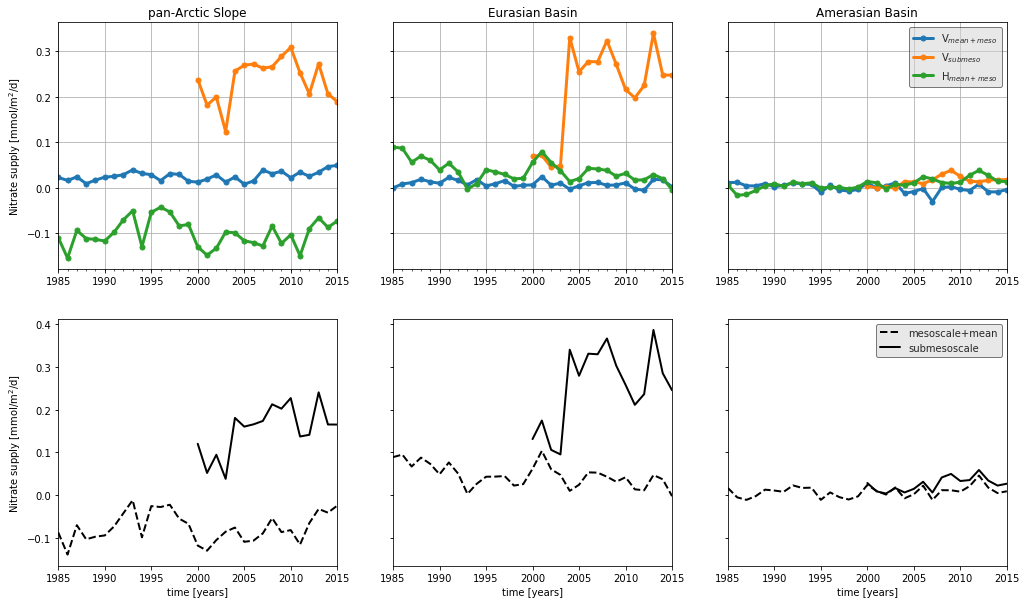

In [3]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
figsize=(17, 10)

rows,cols = 2,3
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=False, sharex=False, sharey='row')#sharey='row'

# fig = plt.figure(figsize=(17, 10), facecolor='w', edgecolor='k', sharex = True, sharey=True)
# axs = fig.subplots(rows,cols,sharey=False,sharex=True)

plt.style.use('seaborn-whitegrid')

df1_sl_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='V$_{mean+meso}$',color=colors(0))
df2_sl_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='V$_{submeso}$',color=colors(1))
df3_sl_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='H$_{mean+meso}$',color=colors(2))
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax1.set_title('pan-Arctic Slope')
ax1.set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
ax1.xaxis.label.set_visible(False)

ax4.plot(years,df1_sl_yearly['VADVv2']+df3_sl_yearly['HADVv2'],'--k',lw=2,label='mesoscale+mean')
ax4.plot(years,df3_sl_yearly['HADVv2']+df2_sl_yearly['VEDYv2']+df1_sl_yearly['VADVv2'],'k',lw=2,label='submesoscale')
ax4.set_xlim(1985,2015)
ax4.set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
ax4.set_xlabel('time [years]')

df1_eu_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='V$_{mean+meso}$',color=colors(0))
df2_eu_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='V$_{submeso}$',color=colors(1))
df3_eu_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='H$_{mean+meso}$',color=colors(2))
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax2.set_title('Eurasian Basin')
ax2.xaxis.label.set_visible(False)

ax5.plot(years,df1_eu_yearly['VADVv2']+df3_eu_yearly['HADVv2'],'--k',lw=2,label='mesoscale+mean')
ax5.plot(years,df3_eu_yearly['HADVv2']+df2_eu_yearly['VEDYv2']+df1_eu_yearly['VADVv2'],'k',lw=2,label='submesoscale')
ax5.set_xlim(1985,2015)
ax5.set_xlabel('time [years]')

df1_am_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = True, label='V$_{mean+meso}$',color=colors(0))
df2_am_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = True, label='V$_{submeso}$',color=colors(1))
df3_am_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = True, label='H$_{mean+meso}$',color=colors(2))
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax3.set_title('Amerasian Basin')
ax3.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax3.xaxis.label.set_visible(False)

ax6.plot(years, df1_am_yearly['VADVv2']+df3_am_yearly['HADVv2'],'--k',lw=2,label='mesoscale+mean')
ax6.plot(years, df3_am_yearly['HADVv2']+df2_am_yearly['VEDYv2']+df1_am_yearly['VADVv2'],'k',lw=2,label='submesoscale')
ax6.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax6.set_xlim(1985,2015)
ax6.set_xlabel('time [years]')

plt.savefig(save_path+'trend.png', dpi = 300, bbox_inches='tight') 

# Statistics